Implement K-NN Classifier for classification of any dataset of your choice.
a. Load an existing data set
b. Split the data set to train and test sets
c. Test your model using test set. Find accuracy and confusion Matrix.
d. Examine the effect of the value of K on accuracy/performance. Plot the curve “k vs
accuracy” and find out the value of k for maximum accuracy for the test samples.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Load the Dataset

In [33]:
# Step 1: Load the Dataset
def load_dataset(file_path):
    df = pd.read_csv(file_path)
    return df

In [34]:
# File path to the dataset
file_path = '/content/ToyotaCorolla.csv'
data = load_dataset(file_path)

In [35]:
# Display the first few rows of the dataset
print(data.head())

   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  ?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ...  Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...             1   
1         10      2002  72937    Diesel  90          1  ...             1   
2          9      2002  41711    Diesel  90          1  ...             0   
3          7      2002  48000    Diesel  90          0  ...             0   
4          3      2002  38500    Diesel  90          0  ...             1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                

In [1]:
import pandas as pd

# Define the file path
file_path = '/content/ToyotaCorolla.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Get the number of rows and columns
num_rows, num_columns = data.shape

# Print the number of rows and columns
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 1436
Number of columns: 37


In [36]:
# Preprocess the data
def preprocess_data(df):
    # Select numerical columns only for simplicity
    df = df.select_dtypes(include=[np.number]).dropna()  # Use only numerical columns and drop rows with NaN

    # Encode categorical targets if necessary
    if df.iloc[:, -1].dtype == 'object':
        le = LabelEncoder()
        df.iloc[:, -1] = le.fit_transform(df.iloc[:, -1])

    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    return X, y

X, y = preprocess_data(data)

b. Split the data set to train and test sets

In [37]:
# Step 2: Split Data
def train_test_split(X, y, test_size=0.3):
    np.random.seed(42)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_index = int(X.shape[0] * (1 - test_size))
    train_indices = indices[:split_index]
    test_indices = indices[split_index:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

c. Test your model using test set. Find accuracy and confusion Matrix.

In [38]:
# Step 3: Implement K-NN Classifier
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, x_train) for x_train in X_train]
        k_nearest_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_nearest_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        y_pred.append(most_common)
    return np.array(y_pred)

In [39]:
# Calculate accuracy and confusion matrix
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred):
    classes = np.unique(y_true)
    matrix = np.zeros((len(classes), len(classes)), dtype=int)
    for true_label, pred_label in zip(y_true, y_pred):
        matrix[true_label, pred_label] += 1
    return matrix

d. Examine the effect of the value of K on accuracy/performance. Plot the curve “k vs
accuracy” and find out the value of k for maximum accuracy for the test samples.

In [40]:
# Step 4: Evaluate Performance
def evaluate_performance(X_train, y_train, X_test, y_test, k_values):
    accuracies = []
    for k in k_values:
        y_pred = knn_predict(X_train, y_train, X_test, k)
        accuracy_value = accuracy(y_test, y_pred)
        accuracies.append(accuracy_value)
        print(f'K={k}, Accuracy={accuracy_value}')
    return accuracies

In [41]:
# Determine the optimal K
k_values = range(1, 21)
accuracies = evaluate_performance(X_train, y_train, X_test, y_test, k_values)

K=1, Accuracy=0.6218097447795824
K=2, Accuracy=0.6890951276102089
K=3, Accuracy=0.6310904872389791
K=4, Accuracy=0.703016241299304
K=5, Accuracy=0.6751740139211136
K=6, Accuracy=0.7006960556844548
K=7, Accuracy=0.6751740139211136
K=8, Accuracy=0.6960556844547564
K=9, Accuracy=0.6821345707656613
K=10, Accuracy=0.6983758700696056
K=11, Accuracy=0.6937354988399071
K=12, Accuracy=0.7076566125290024
K=13, Accuracy=0.7006960556844548
K=14, Accuracy=0.7076566125290024
K=15, Accuracy=0.7076566125290024
K=16, Accuracy=0.7053364269141531
K=17, Accuracy=0.7053364269141531
K=18, Accuracy=0.7099767981438515
K=19, Accuracy=0.6937354988399071
K=20, Accuracy=0.7076566125290024


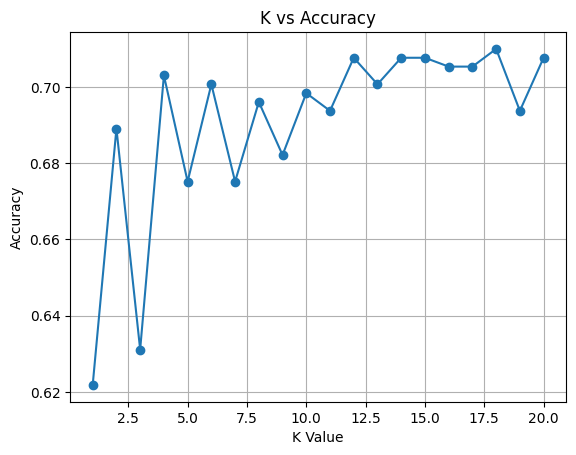

In [42]:
# Plot the accuracy vs. K
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.grid(True)
plt.show()

In [44]:
# Find the minimum K with the highest accuracy
max_accuracy = max(accuracies)
optimal_ks = [k for k, acc in zip(k_values, accuracies) if acc == max_accuracy]
best_k = min(optimal_ks)
print(f'The optimal (smallest) K is {best_k}')

The optimal (smallest) K is 18


In [45]:
# For confusion matrix and accuracy with the best K
y_best_pred = knn_predict(X_train, y_train, X_test, best_k)
conf_matrix = confusion_matrix(y_test, y_best_pred)
accuracy_value = accuracy(y_test, y_best_pred)

print('Confusion Matrix:')
print(conf_matrix)
print(f'Accuracy with K={best_k}: {accuracy_value}')

Confusion Matrix:
[[303   5]
 [120   3]]
Accuracy with K=18: 0.7099767981438515
